In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('all_matches.csv')
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df.columns) , len(df)

(22, 225954)

In [4]:
df.dtypes

match_id                  int64  
season                    object 
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [7]:
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021, 2022], dtype=int64)

In [6]:
df['season'] = df['season'].replace(['2007/08'],2008)
df['season'] = df['season'].replace(['2009/10'],2010)
df['season'] = df['season'].replace(['2020/21'],2020)

df['season'] = df['season'].astype('int64')

In [8]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
df.tail(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [9]:
dhoni_df = df[(df.year >= 2020) & (df.year <= 2022)]
dhoni_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
179058,1216492,2020,2020-09-19,Sheikh Zayed Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [10]:
dhoni_df.batting_team.unique()

array(['Mumbai Indians', 'Chennai Super Kings', 'Delhi Capitals',
       'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Kolkata Knight Riders',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [11]:
dhoni_df['batting_team'] = dhoni_df['batting_team'].replace(['Kings XI Punjab'],'Punjab Kings')

In [12]:
dhoni_df[dhoni_df['batting_team'] == 'Chennai Super Kings']['striker'].unique()

array(['M Vijay', 'SR Watson', 'F du Plessis', 'AT Rayudu', 'RA Jadeja',
       'SM Curran', 'MS Dhoni', 'RD Gaikwad', 'KM Jadhav', 'N Jagadeesan',
       'DJ Bravo', 'DL Chahar', 'SN Thakur', 'Imran Tahir', 'MM Ali',
       'SK Raina', 'RV Uthappa', 'DP Conway', 'S Dube', 'D Pretorius',
       'CJ Jordan', 'Mukesh Choudhary', 'MJ Santner', 'Simarjeet Singh',
       'M Theekshana'], dtype=object)

In [13]:
msdf = dhoni_df[dhoni_df['striker'] == 'MS Dhoni']
msdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
179298,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,18.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,F du Plessis,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179299,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,18.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,F du Plessis,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
180017,1216496,2020,2020-09-22,Sharjah Cricket Stadium,2,13.6,Chennai Super Kings,Rajasthan Royals,MS Dhoni,F du Plessis,TK Curran,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
180018,1216496,2020,2020-09-22,Sharjah Cricket Stadium,2,13.7,Chennai Super Kings,Rajasthan Royals,MS Dhoni,F du Plessis,TK Curran,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
180019,1216496,2020,2020-09-22,Sharjah Cricket Stadium,2,14.1,Chennai Super Kings,Rajasthan Royals,MS Dhoni,F du Plessis,R Tewatia,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [15]:
msdf['year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [16]:
msdf['ball'].count()

484

In [17]:
df1 = pd.DataFrame(dhoni_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
df1.head()

,striker,runs_off_bat
0,A Badoni,161
1,A Manohar,108
2,A Nortje,8
3,A Tomar,4
4,AB de Villiers,773


In [19]:
df2 = pd.DataFrame(dhoni_df.groupby('striker')['ball'].count()).reset_index()
df2.head()

,striker,ball
0,A Badoni,139
1,A Manohar,79
2,A Nortje,13
3,A Tomar,8
4,AB de Villiers,511


In [21]:
df3 = df1.merge(df2, on = 'striker', how = 'left')
df3.head()

,striker,runs_off_bat,ball
0,A Badoni,161,139
1,A Manohar,108,79
2,A Nortje,8,13
3,A Tomar,4,8
4,AB de Villiers,773,511


In [22]:
df3['strike_rate'] = 100 * df3['runs_off_bat']/df3['ball']
df3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,161,139,115.827338
1,A Manohar,108,79,136.708861
2,A Nortje,8,13,61.538462
3,A Tomar,4,8,50.000000
4,AB de Villiers,773,511,151.272016


##### criteria : minimum 250 balls since dhoni has played 484 balls in last 3 seasons of ipl

In [24]:
df3 = df3[df3['ball'] >= 250]
df3.head()

,striker,runs_off_bat,ball,strike_rate
4,AB de Villiers,773,511,151.272016
5,AD Russell,635,409,155.256724
7,AJ Finch,354,324,109.259259
9,AK Markram,527,400,131.750000
10,AM Rahane,254,253,100.395257


In [25]:
df3.striker.unique()

array(['AB de Villiers', 'AD Russell', 'AJ Finch', 'AK Markram',
       'AM Rahane', 'AR Patel', 'AT Rayudu', 'Abhishek Sharma',
       'CH Gayle', 'D Padikkal', 'DA Miller', 'DA Warner', 'DJ Hooda',
       'EJG Morgan', 'F du Plessis', 'GJ Maxwell', 'HH Pandya',
       'Ishan Kishan', 'JC Buttler', 'JM Bairstow', 'KA Pollard',
       'KD Karthik', 'KH Pandya', 'KL Rahul', 'KS Williamson',
       'LS Livingstone', 'MA Agarwal', 'MK Pandey', 'MM Ali',
       'MP Stoinis', 'MS Dhoni', 'N Pooran', 'N Rana', 'PP Shaw',
       'Q de Kock', 'R Parag', 'R Tewatia', 'RA Jadeja', 'RA Tripathi',
       'RD Gaikwad', 'RG Sharma', 'RM Patidar', 'RR Pant', 'RV Uthappa',
       'S Dhawan', 'S Dube', 'SA Yadav', 'SO Hetmyer', 'SPD Smith',
       'SR Watson', 'SS Iyer', 'SV Samson', 'Shahbaz Ahmed',
       'Shubman Gill', 'Tilak Varma', 'V Kohli', 'VR Iyer', 'WP Saha',
       'YBK Jaiswal'], dtype=object)

In [27]:
wk_df = df3[(df3.striker == 'MS Dhoni') | (df3.striker == 'AB de Villiers') | (df3.striker == 'Ishan Kishan') | (df3.striker == 'JC Buttler') | (df3.striker == 'JM Bairstow') | (df3.striker == 'KD Karthik') | (df3.striker == 'KL Rahul') | (df3.striker == 'N Pooran')| (df3.striker == 'Q de Kock') | (df3.striker == 'RR Pant') | (df3.striker == 'SV Samson') | (df3.striker == 'WP Saha')]
wk_df

,striker,runs_off_bat,ball,strike_rate
4,AB de Villiers,773,511,151.272016
70,Ishan Kishan,1175,898,130.846325
75,JC Buttler,1445,1002,144.211577
81,JM Bairstow,846,643,131.570762
92,KD Karthik,722,497,145.271630
97,KL Rahul,1918,1468,130.653951
123,MS Dhoni,546,484,112.809917
134,N Pooran,744,520,143.076923
153,Q de Kock,1311,979,133.912155
170,RR Pant,1109,896,123.772321


In [29]:
wk_df.reset_index(inplace = True, drop = True)
wk_df.sort_values('strike_rate',ascending = False)

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,773,511,151.272016
4,KD Karthik,722,497,145.271630
2,JC Buttler,1445,1002,144.211577
7,N Pooran,744,520,143.076923
10,SV Samson,1317,935,140.855615
8,Q de Kock,1311,979,133.912155
3,JM Bairstow,846,643,131.570762
1,Ishan Kishan,1175,898,130.846325
5,KL Rahul,1918,1468,130.653951
9,RR Pant,1109,896,123.772321


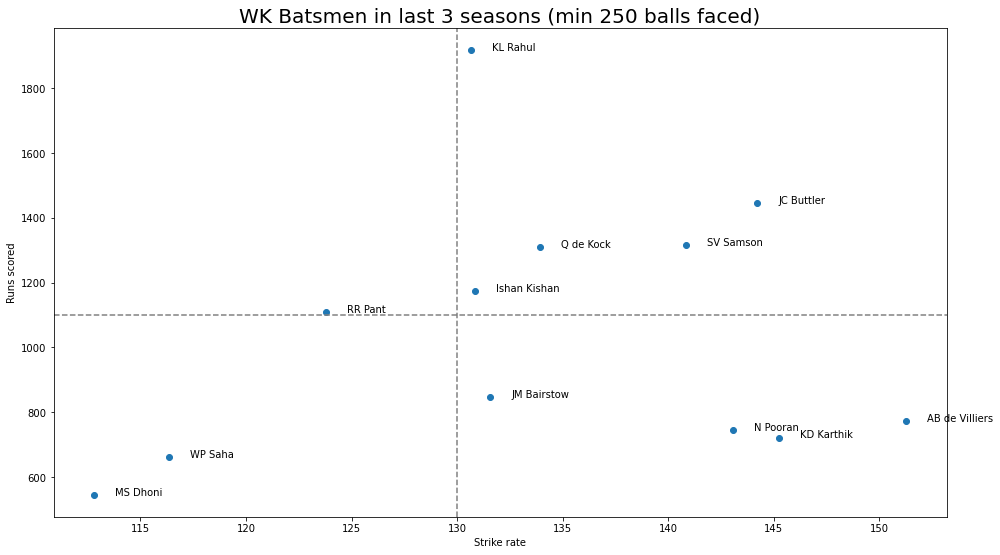

In [32]:
plt.figure(figsize = (16,9))
plt.scatter(wk_df.strike_rate, wk_df.runs_off_bat)
for i in range(len(wk_df)):
    plt.text(wk_df['strike_rate'][i] +1 , wk_df['runs_off_bat'][i] -1 ,wk_df['striker'][i])
plt.axvline(130, ls = '--', color = 'grey')
plt.axhline(1100, ls = '--', color = 'grey')
plt.title('WK Batsmen in last 3 seasons (min 250 balls faced)', fontsize =20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

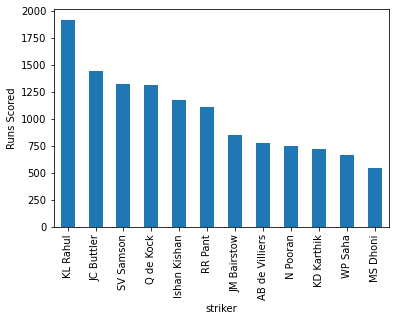

In [33]:
wk_df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).plot(kind= 'bar')
plt.ylabel('Runs Scored')
plt.show()

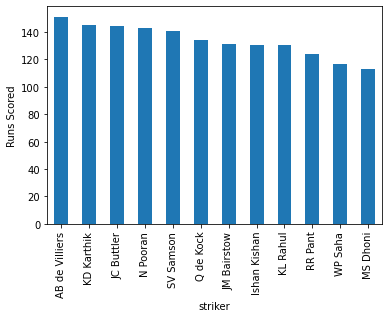

In [34]:
wk_df.groupby(['striker'])['strike_rate'].sum().sort_values(ascending=False).plot(kind= 'bar')
plt.ylabel('Runs Scored')
plt.show()